# Introduction
This is a visualisation project to show some of the results of a study into worldwide cities with the best Work/Life balance in 2022

# Importing the data

I begin by importing my csv file from Github and creating my pandas Dataframe.  

As there are a number of percentages, I want to convert these to usable numbers and then to integers or floats using a solution I found on Stackoverflow (see Ref 1 in references)

I check df.head() to make sure it has imported ok. 

Using a mix of 'na_values' and the code from stack overflow, the percentages are now converted to decimals. 

I can also see from df.info() that there are some null values and some number values that are classified as objects which I will deal with later.

In [106]:
import pandas as pd
import re
import decimal
D = decimal.Decimal

def make_parser(cls):
    def parse_commas(text):
        return cls(re.sub(r'[^-+\d.]', '', text))
    return parse_commas

to_int = make_parser(int)
to_decimal = make_parser(D)

df = pd.read_csv('https://raw.githubusercontent.com/oheag2/UCDDataAnalytics/main/work_life.csv', na_values="-", converters={4: to_decimal, 5: to_decimal, 9: to_decimal, 10: to_decimal, 11: to_decimal}, index_col=0)

df.head()

#import my csv file from github and then print the head to make sure it imported ok/looks ok

#create pandas dataframe


,2021,City,Country,Remote Jobs,Overworked Population,Minimum Vacations Offered (Days),Vacations Taken (Days),Unemployment,Multiple Jobholders,Inflation,...,Healthcare,Access to Mental Healthcare,Inclusivity & Tolerance,Affordability,"Happiness, Culture & Leisure",City Safety,Outdoor Spaces,Air Quality,Wellness and Fitness,TOTAL SCORE
2022,,,,,,,,,,,,,,,,,,,,,
1,2.0,Oslo,Norway,41.72,11.20,25,25.0,94.7,9.10,6.47,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
2,NaN,Bern,Switzerland,44.86,11.40,20,25.0,99.8,7.60,1.80,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
3,1.0,Helsinki,Finland,38.92,12.70,25,30.0,89.3,6.30,4.79,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
4,3.0,Zurich,Switzerland,44.86,11.90,20,25.0,99.2,7.60,1.80,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
5,5.0,Copenhagen,Denmark,41.42,10.50,25,28.0,94.8,7.60,5.18,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21


In [107]:
df.info()

#check for object types and null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   2021                              50 non-null     float64
 1   City                              100 non-null    object 
 2   Country                           100 non-null    object 
 3   Remote Jobs                       100 non-null    object 
 4   Overworked Population             100 non-null    object 
 5   Minimum Vacations Offered (Days)  100 non-null    int64  
 6   Vacations Taken (Days)            97 non-null     float64
 7   Unemployment                      100 non-null    float64
 8   Multiple Jobholders               100 non-null    object 
 9   Inflation                         100 non-null    object 
 10  Paid Parental Leave (Days)        100 non-null    object 
 11  Covid Impact                      100 non-null    float64
 12  Covid Su

# Tidying and cleaning the data

I can see that the 2021 column has a large number of null values and as it doesn't really have any relevance, I decide to drop it.

I then rename my columns to make them easier to use. 

In [108]:
df = df.drop(columns='2021')

In [109]:
#rename columns to more usable titles and check info to see new titles

df.columns = ["City", "Country", "remotejob_pcnt", "overworked_pcnt", "vacdays_offered", "vacdays_taken", "unemployment", "multjob_pcnt", "inflation_pcnt", "parental_leave", "covid_impact", "covid_support", "healthcare", "mental_healthcare", "inclusivity", "affordability", "happiness", "city_safety", "outdoor_space", "air_qual", "wellness", "total_score"]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               100 non-null    object 
 1   Country            100 non-null    object 
 2   remotejob_pcnt     100 non-null    object 
 3   overworked_pcnt    100 non-null    object 
 4   vacdays_offered    100 non-null    int64  
 5   vacdays_taken      97 non-null     float64
 6   unemployment       100 non-null    float64
 7   multjob_pcnt       100 non-null    object 
 8   inflation_pcnt     100 non-null    object 
 9   parental_leave     100 non-null    object 
 10  covid_impact       100 non-null    float64
 11  covid_support      100 non-null    float64
 12  healthcare         100 non-null    float64
 13  mental_healthcare  100 non-null    float64
 14  inclusivity        100 non-null    float64
 15  affordability      100 non-null    float64
 16  happiness          100 non

Here, I convert some of the numeric columns that are classified as type 'object' to numeric values

In [110]:
df[["remotejob_pcnt", "overworked_pcnt", "multjob_pcnt", "inflation_pcnt", "parental_leave"]] = df[["remotejob_pcnt", "overworked_pcnt", "multjob_pcnt", "inflation_pcnt", "parental_leave"]].apply(pd.to_numeric)

Now when I check df.info(), I have all numeric columns as integers or floats as I wanted

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               100 non-null    object 
 1   Country            100 non-null    object 
 2   remotejob_pcnt     100 non-null    float64
 3   overworked_pcnt    100 non-null    float64
 4   vacdays_offered    100 non-null    int64  
 5   vacdays_taken      97 non-null     float64
 6   unemployment       100 non-null    float64
 7   multjob_pcnt       100 non-null    float64
 8   inflation_pcnt     100 non-null    float64
 9   parental_leave     100 non-null    float64
 10  covid_impact       100 non-null    float64
 11  covid_support      100 non-null    float64
 12  healthcare         100 non-null    float64
 13  mental_healthcare  100 non-null    float64
 14  inclusivity        100 non-null    float64
 15  affordability      100 non-null    float64
 16  happiness          100 non

Checking for null values, I find 3 in the 'Vacation Days taken column'

In [112]:
#check for null values

df.isnull().sum()

City                 0
Country              0
remotejob_pcnt       0
overworked_pcnt      0
vacdays_offered      0
vacdays_taken        3
unemployment         0
multjob_pcnt         0
inflation_pcnt       0
parental_leave       0
covid_impact         0
covid_support        0
healthcare           0
mental_healthcare    0
inclusivity          0
affordability        0
happiness            0
city_safety          0
outdoor_space        0
air_qual             0
wellness             0
total_score          0
dtype: int64

I decide to find the mean of this column and replace all nulls with it. 

In [113]:
print(df['vacdays_taken'].mean())

15.100000000000005


In [114]:
import numpy as np

df['vacdays_taken'] = df['vacdays_taken'].replace(np.nan, 15.1)

Now when I check isnull, all my nulls are gone. 

In [115]:
df.isnull().sum()

City                 0
Country              0
remotejob_pcnt       0
overworked_pcnt      0
vacdays_offered      0
vacdays_taken        0
unemployment         0
multjob_pcnt         0
inflation_pcnt       0
parental_leave       0
covid_impact         0
covid_support        0
healthcare           0
mental_healthcare    0
inclusivity          0
affordability        0
happiness            0
city_safety          0
outdoor_space        0
air_qual             0
wellness             0
total_score          0
dtype: int64

# Preparation & Analysis

We can pull data from the dataframe by iterating over it, for example if I want to see how many vacation days are offered but also how many are actually taken

In [116]:
for index, row in df.head().iterrows():
    print(f"{row[1]} gets a minimum of {row[4]} vacation days and takes {row[5]}")

Norway gets a minimum of 25 vacation days and takes 25.0
Switzerland gets a minimum of 20 vacation days and takes 25.0
Finland gets a minimum of 25 vacation days and takes 30.0
Switzerland gets a minimum of 20 vacation days and takes 25.0
Denmark gets a minimum of 25 vacation days and takes 28.0


Now, I want to add a new column to my dataframe to categorise each country into a continent

In [117]:
def continent(df):
    if df in ['USA', 'Canada']:
        return 'North America'
    elif df in ['Brazil', 'Argentina', 'Uruguay']:
        return 'South America'
    elif df in ['Germany', 'Norway', 'Ireland', 'Finland', 'Switzerland', 'Denmark', 'Sweden', 'Netherlands', 'UK', 'France', 'Austria', 'Belgium', 'Spain', 'Portugal', 'Hungary', 'Italy']:
        return "Europe"
    elif df in ['Japan', 'Singapore', 'South Korea', 'Hong Kong', 'Thailand', 'Malaysia', 'UAE']:
        return "Asia & Middle East"
    elif df in ['Australia', 'New Zealand']:
        return "Oceania"
    elif df in ['South Africa']:
        return "Africa"

In [118]:
df["continent"] = df['Country'].apply(continent)

Now when I print the first 10 lines of the head of df, I can see my new continent column at the end

In [119]:
df.head(10)

,City,Country,remotejob_pcnt,overworked_pcnt,vacdays_offered,vacdays_taken,unemployment,multjob_pcnt,inflation_pcnt,parental_leave,...,mental_healthcare,inclusivity,affordability,happiness,city_safety,outdoor_space,air_qual,wellness,total_score,continent
2022,,,,,,,,,,,,,,,,,,,,,
1,Oslo,Norway,41.72,11.2,25,25.0,94.7,9.1,6.47,707.0,...,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00,Europe
2,Bern,Switzerland,44.86,11.4,20,25.0,99.8,7.6,1.80,98.0,...,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46,Europe
3,Helsinki,Finland,38.92,12.7,25,30.0,89.3,6.3,4.79,1190.0,...,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24,Europe
4,Zurich,Switzerland,44.86,11.9,20,25.0,99.2,7.6,1.80,98.0,...,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33,Europe
5,Copenhagen,Denmark,41.42,10.5,25,28.0,94.8,7.6,5.18,364.0,...,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21,Europe
6,Geneva,Switzerland,44.86,11.9,20,25.0,95.2,7.6,1.80,98.0,...,78.6,94.4,70.7,100.0,85.4,92.0,96.8,67.7,95.82,Europe
7,Ottawa,Canada,37.81,10.1,10,16.0,95.8,5.6,6.46,364.0,...,92.4,93.5,70.7,81.4,84.8,97.0,99.2,68.7,95.51,North America
8,Sydney,Australia,38.79,9.7,20,14.0,95.9,6.4,6.46,140.0,...,67.4,91.8,73.3,87.7,77.6,97.9,98.0,70.5,94.04,Oceania
9,Stuttgart,Germany,36.73,11.7,20,26.0,95.2,4.8,6.26,466.9,...,82.0,91.6,79.3,85.5,78.7,90.8,95.8,67.0,93.79,Europe


# Merging dataframes

I also have a dataframe that lists the health aspects of some of the cities in my original database. However as it only contains about the half the cities as my original database, I don't want to use it for all my analysis as I will lose too much data so I am going to create another smaller database for some analysis later on. 

In [120]:
df2 = pd.read_csv('https://raw.githubusercontent.com/oheag2/UCDDataAnalytics/main/healthy_life.csv', na_values="-", converters={3: to_decimal, 4: to_decimal, 11: to_decimal})

df2.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.0,1.92,20.40,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,29.00,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,20.10,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,20.60,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,19.70,79.8,21.24,1380.0,7.64,154,523,32.53


I import my csv file, amending any currencies and percentages to decimals and check the head of the data. Then I drop the rank column as this doesn't apply for this dataframe and I rename the columns to more usable titles. 

In [121]:
df2 = df2.drop(columns='Rank')

In [122]:
df2.columns = ["City", "sunshine", "water_cost", "obesity", "life_expect", "poll_index", "hrs_worked", "happiness", "outdoor", "takeaway_locs", "gymcost"]

In [123]:
df2.head() #Check the head again to see the new column titles

,City,sunshine,water_cost,obesity,life_expect,poll_index,hrs_worked,happiness,outdoor,takeaway_locs,gymcost
0,Amsterdam,1858.0,1.92,20.40,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2636.0,1.48,29.00,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,1884.0,1.94,20.10,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,1821.0,1.72,20.60,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,1630.0,2.19,19.70,79.8,21.24,1380.0,7.64,154,523,32.53


In [124]:
df2.info() #Check for value types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           44 non-null     object 
 1   sunshine       43 non-null     float64
 2   water_cost     44 non-null     object 
 3   obesity        44 non-null     object 
 4   life_expect    44 non-null     float64
 5   poll_index     43 non-null     float64
 6   hrs_worked     33 non-null     float64
 7   happiness      44 non-null     float64
 8   outdoor        44 non-null     int64  
 9   takeaway_locs  44 non-null     int64  
 10  gymcost        44 non-null     object 
dtypes: float64(5), int64(2), object(4)
memory usage: 3.9+ KB


In [125]:
df2.isnull().sum() #check for nulls

City              0
sunshine          1
water_cost        0
obesity           0
life_expect       0
poll_index        1
hrs_worked       11
happiness         0
outdoor           0
takeaway_locs     0
gymcost           0
dtype: int64

Checking info and isnull tells me I still have a few numbers as object types as well as a number of nulls to deal with. I will amend those objects to numbers first. However, some of these nulls wont carry across when I merge my dfs so I will join them and then address the nulls. 

In [126]:
df2[["water_cost", "obesity", "gymcost"]] = df2[["water_cost", "obesity", "gymcost"]].apply(pd.to_numeric)

In [127]:
df2.info() #check to make sure all numbers are now ints or floats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           44 non-null     object 
 1   sunshine       43 non-null     float64
 2   water_cost     44 non-null     float64
 3   obesity        44 non-null     float64
 4   life_expect    44 non-null     float64
 5   poll_index     43 non-null     float64
 6   hrs_worked     33 non-null     float64
 7   happiness      44 non-null     float64
 8   outdoor        44 non-null     int64  
 9   takeaway_locs  44 non-null     int64  
 10  gymcost        44 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 3.9+ KB


Now I merge my original dataframe with the new dataframe using a left join and print the head

In [137]:
work_health = df.merge(df2, on="City", how="left")
work_health.head()

,City,Country,remotejob_pcnt,overworked_pcnt,vacdays_offered,vacdays_taken,unemployment,multjob_pcnt,inflation_pcnt,parental_leave,...,sunshine,water_cost,obesity,life_expect,poll_index,hrs_worked,happiness_y,outdoor,takeaway_locs,gymcost
0,Oslo,Norway,41.72,11.2,25,25.0,94.7,9.1,6.47,707.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bern,Switzerland,44.86,11.4,20,25.0,99.8,7.6,1.80,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Helsinki,Finland,38.92,12.7,25,30.0,89.3,6.3,4.79,1190.0,...,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113.0,309.0,35.23
3,Zurich,Switzerland,44.86,11.9,20,25.0,99.2,7.6,1.80,98.0,...,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69.0,538.0,73.11
4,Copenhagen,Denmark,41.42,10.5,25,28.0,94.8,7.6,5.18,364.0,...,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154.0,523.0,32.53


Checking for nulls, shows me that there are a huge amount of nulls in this dataframe. As its not my main dataframe, I am going to drop any rows with a number of missing null values, as this new dataframe had only 45 rows compared to 100 in my original. 

In [138]:
work_health.isnull().sum()

City                  0
Country               0
remotejob_pcnt        0
overworked_pcnt       0
vacdays_offered       0
vacdays_taken         0
unemployment          0
multjob_pcnt          0
inflation_pcnt        0
parental_leave        0
covid_impact          0
covid_support         0
healthcare            0
mental_healthcare     0
inclusivity           0
affordability         0
happiness_x           0
city_safety           0
outdoor_space         0
air_qual              0
wellness              0
total_score           0
continent             0
sunshine             71
water_cost           70
obesity              70
life_expect          70
poll_index           70
hrs_worked           74
happiness_y          70
outdoor              70
takeaway_locs        70
gymcost              70
dtype: int64

In [139]:
work_health = work_health.dropna()

work_health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 2 to 87
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               25 non-null     object 
 1   Country            25 non-null     object 
 2   remotejob_pcnt     25 non-null     float64
 3   overworked_pcnt    25 non-null     float64
 4   vacdays_offered    25 non-null     int64  
 5   vacdays_taken      25 non-null     float64
 6   unemployment       25 non-null     float64
 7   multjob_pcnt       25 non-null     float64
 8   inflation_pcnt     25 non-null     float64
 9   parental_leave     25 non-null     float64
 10  covid_impact       25 non-null     float64
 11  covid_support      25 non-null     float64
 12  healthcare         25 non-null     float64
 13  mental_healthcare  25 non-null     float64
 14  inclusivity        25 non-null     float64
 15  affordability      25 non-null     float64
 16  happiness_x        25 non-nu

Now I have a smaller dataframe which can be used to show the health of some of my cities later on. 

In [140]:
work_health

,City,Country,remotejob_pcnt,overworked_pcnt,vacdays_offered,vacdays_taken,unemployment,multjob_pcnt,inflation_pcnt,parental_leave,...,sunshine,water_cost,obesity,life_expect,poll_index,hrs_worked,happiness_y,outdoor,takeaway_locs,gymcost
2,Helsinki,Finland,38.92,12.7,25,30.0,89.3,6.3,4.79,1190.0,...,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113.0,309.0,35.23
3,Zurich,Switzerland,44.86,11.9,20,25.0,99.2,7.6,1.80,98.0,...,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69.0,538.0,73.11
4,Copenhagen,Denmark,41.42,10.5,25,28.0,94.8,7.6,5.18,364.0,...,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154.0,523.0,32.53
7,Sydney,Australia,38.79,9.7,20,14.0,95.9,6.4,6.46,140.0,...,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406.0,1103.0,41.66
10,Stockholm,Sweden,44.20,12.7,25,25.0,91.0,7.9,5.74,490.0,...,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129.0,598.0,37.31
11,Melbourne,Australia,38.79,9.7,20,14.0,94.5,6.4,6.46,140.0,...,2363.0,1.57,29.0,82.1,25.90,1712.0,7.22,243.0,813.0,36.89
12,Amsterdam,Netherlands,41.55,8.6,20,24.0,95.4,8.1,8.55,114.8,...,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422.0,1048.0,34.90
13,Tokyo,Japan,36.52,15.4,10,25.5,96.2,3.6,0.89,770.0,...,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387.0,5802.0,70.82
15,Vancouver,Canada,37.81,10.1,10,16.0,93.5,6.7,6.46,364.0,...,1938.0,1.08,29.4,81.7,24.26,1670.0,7.23,218.0,788.0,31.04
18,Toronto,Canada,37.81,10.1,10,16.0,90.4,5.6,6.46,364.0,...,2066.0,1.09,29.4,81.7,37.83,1670.0,7.23,174.0,1656.0,32.64


Looking at the dataframe, I can see the index column has the old values so I reset the index and drop the old index column

In [145]:
work_health = work_health.reset_index()

In [146]:
work_health.head(20)

,index,City,Country,remotejob_pcnt,overworked_pcnt,vacdays_offered,vacdays_taken,unemployment,multjob_pcnt,inflation_pcnt,...,sunshine,water_cost,obesity,life_expect,poll_index,hrs_worked,happiness_y,outdoor,takeaway_locs,gymcost
0,0,Helsinki,Finland,38.92,12.7,25,30.0,89.3,6.3,4.79,...,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113.0,309.0,35.23
1,1,Zurich,Switzerland,44.86,11.9,20,25.0,99.2,7.6,1.80,...,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69.0,538.0,73.11
2,2,Copenhagen,Denmark,41.42,10.5,25,28.0,94.8,7.6,5.18,...,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154.0,523.0,32.53
3,3,Sydney,Australia,38.79,9.7,20,14.0,95.9,6.4,6.46,...,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406.0,1103.0,41.66
4,4,Stockholm,Sweden,44.20,12.7,25,25.0,91.0,7.9,5.74,...,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129.0,598.0,37.31
5,5,Melbourne,Australia,38.79,9.7,20,14.0,94.5,6.4,6.46,...,2363.0,1.57,29.0,82.1,25.90,1712.0,7.22,243.0,813.0,36.89
6,6,Amsterdam,Netherlands,41.55,8.6,20,24.0,95.4,8.1,8.55,...,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422.0,1048.0,34.90
7,7,Tokyo,Japan,36.52,15.4,10,25.5,96.2,3.6,0.89,...,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387.0,5802.0,70.82
8,8,Vancouver,Canada,37.81,10.1,10,16.0,93.5,6.7,6.46,...,1938.0,1.08,29.4,81.7,24.26,1670.0,7.23,218.0,788.0,31.04
9,9,Toronto,Canada,37.81,10.1,10,16.0,90.4,5.6,6.46,...,2066.0,1.09,29.4,81.7,37.83,1670.0,7.23,174.0,1656.0,32.64


In [147]:
work_health = work_health.drop(columns='index')

In [148]:
work_health

,City,Country,remotejob_pcnt,overworked_pcnt,vacdays_offered,vacdays_taken,unemployment,multjob_pcnt,inflation_pcnt,parental_leave,...,sunshine,water_cost,obesity,life_expect,poll_index,hrs_worked,happiness_y,outdoor,takeaway_locs,gymcost
0,Helsinki,Finland,38.92,12.7,25,30.0,89.3,6.3,4.79,1190.0,...,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113.0,309.0,35.23
1,Zurich,Switzerland,44.86,11.9,20,25.0,99.2,7.6,1.80,98.0,...,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69.0,538.0,73.11
2,Copenhagen,Denmark,41.42,10.5,25,28.0,94.8,7.6,5.18,364.0,...,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154.0,523.0,32.53
3,Sydney,Australia,38.79,9.7,20,14.0,95.9,6.4,6.46,140.0,...,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406.0,1103.0,41.66
4,Stockholm,Sweden,44.20,12.7,25,25.0,91.0,7.9,5.74,490.0,...,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129.0,598.0,37.31
5,Melbourne,Australia,38.79,9.7,20,14.0,94.5,6.4,6.46,140.0,...,2363.0,1.57,29.0,82.1,25.90,1712.0,7.22,243.0,813.0,36.89
6,Amsterdam,Netherlands,41.55,8.6,20,24.0,95.4,8.1,8.55,114.8,...,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422.0,1048.0,34.90
7,Tokyo,Japan,36.52,15.4,10,25.5,96.2,3.6,0.89,770.0,...,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387.0,5802.0,70.82
8,Vancouver,Canada,37.81,10.1,10,16.0,93.5,6.7,6.46,364.0,...,1938.0,1.08,29.4,81.7,24.26,1670.0,7.23,218.0,788.0,31.04
9,Toronto,Canada,37.81,10.1,10,16.0,90.4,5.6,6.46,364.0,...,2066.0,1.09,29.4,81.7,37.83,1670.0,7.23,174.0,1656.0,32.64


In [149]:
work_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               25 non-null     object 
 1   Country            25 non-null     object 
 2   remotejob_pcnt     25 non-null     float64
 3   overworked_pcnt    25 non-null     float64
 4   vacdays_offered    25 non-null     int64  
 5   vacdays_taken      25 non-null     float64
 6   unemployment       25 non-null     float64
 7   multjob_pcnt       25 non-null     float64
 8   inflation_pcnt     25 non-null     float64
 9   parental_leave     25 non-null     float64
 10  covid_impact       25 non-null     float64
 11  covid_support      25 non-null     float64
 12  healthcare         25 non-null     float64
 13  mental_healthcare  25 non-null     float64
 14  inclusivity        25 non-null     float64
 15  affordability      25 non-null     float64
 16  happiness_x        25 non-nu

# Visualisation

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

# Chart 1 - The impact of Covid
It's impossible to ignore the impact covid is still having on life and this scatterplot shows how both the impact of covid (health, economic and social) on a city and the support the city received (financially) affected the cities overall score of a good work/life balance.

We can clearly see that those cities who received better support during covid had an overall better total score, even if they were also heavily impacted by covid. Additionally, we can see that some cities had lower levels of impact but also lower levels of support and therefore lower overall scores. 

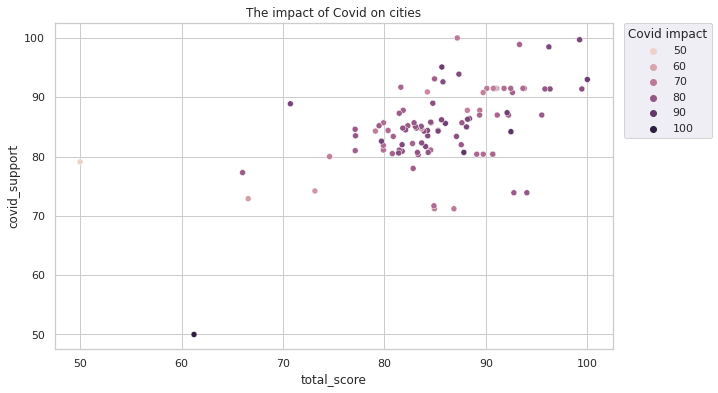

In [151]:
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='total_score', y="covid_support", hue="covid_impact").set(title="The impact of Covid on cities")
sns.set(rc = {'figure.figsize':(10,6)})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Covid impact")

# Chart 2 - Access to Healthcare

In this chart below, I compared the total score for each city with their access to both healthcare and mental healthcare and I compared this by continent.

We can clearly see that those with better access to healthcare have a much higher overall score, and that Europe comes out near the top for both access to healthcare and the total score as a result of this with Oceania also scoring highly.

South America doesn't rank very highly for access to healthcare while Africa barely makes a blip appearing in the bottom left corner. Similarly Asia & the Middle East have differing scores with those with low access to healthcare also showing a low overall score

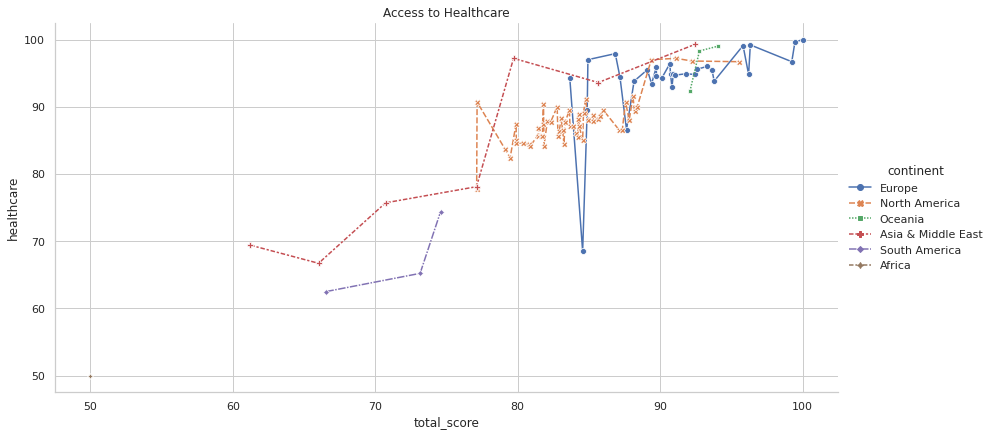

In [152]:
sns.set_style("whitegrid")
sns.relplot(x="total_score", y="healthcare", data=df, kind="line", style="continent", hue="continent", height=6, aspect=16/8, markers=True).set(title="Access to Healthcare")


# # Chart 2b - Access to Mental Healthcare

In this chart below, we see results for Mental Healthcare access and its impact on the overall score. However, while access to Mental Healthcare overall is less than access to general Healthcare, this doesn't impact the overall score as much, with lower access figures still having high overall total scores. 

Where Asia scores high for mental healthcare access, its overall score drops dramatically when access drops. 

Europe doesn't score as well for mental healthcare access as it did for healthcare access but overall it's relatively high access keeps its total score up. 

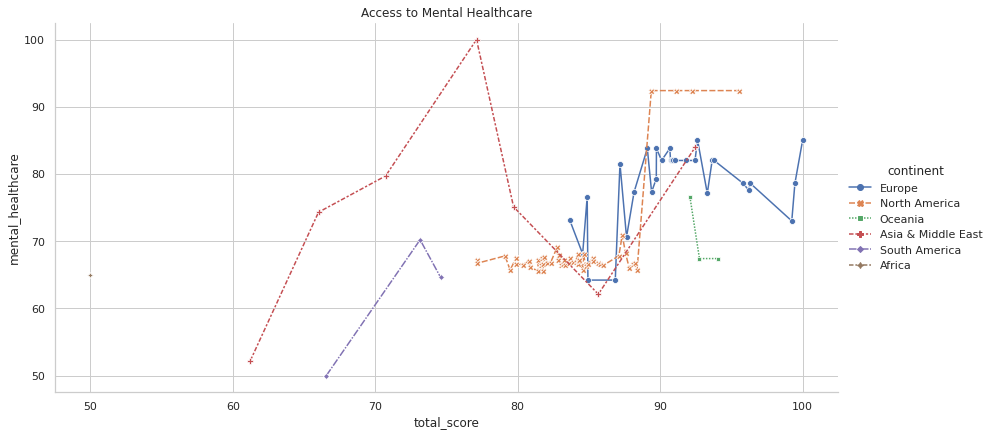

In [153]:
sns.set_style("whitegrid")
sns.relplot(x="total_score", y="mental_healthcare", data=df, kind="line", style="continent", hue="continent", height=6, aspect=16/8, markers=True).set(title="Access to Mental Healthcare")

# Chart 3 - Work and vacation time

Comparing vacation days both offered and taken, as well as the percentage of people who are overworked, we can see that the higher the amount of days offered and taken, the higher the total score. 

Additionally, we can see that as the overworked population percentage decreases, the overal total score increases

Text(0.5, 0, 'Total score')

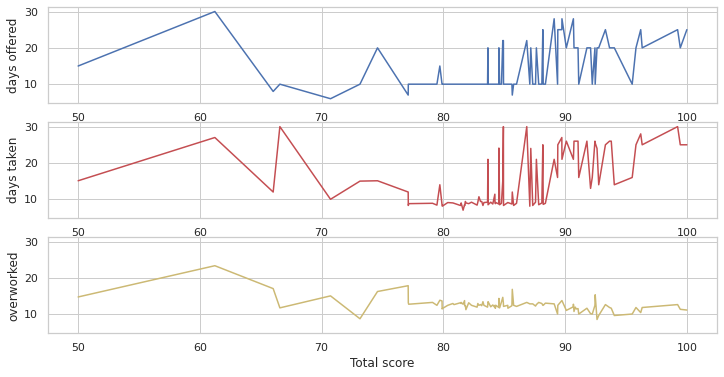

In [154]:
fig, ax = plt.subplots(3, 1, sharey=True)
fig.set_size_inches([12,6])
ax[0].plot(df["total_score"], df["vacdays_offered"], color="b")
ax[1].plot(df["total_score"], df["vacdays_taken"], color="r")
ax[2].plot(df["total_score"], df["overworked_pcnt"], color="y")
ax[0].set_ylabel("days offered")
ax[1].set_ylabel("days taken")
ax[2].set_ylabel("overworked")

#Only the bottom table gets an x axis label
ax[2].set_xlabel("Total score")

# Chart 4 - Outdoor living

From the below chart, we can see how having outdoor space and good air quality can make a different to happiness levels. 

We can clearly see that countries with more outdoor spaces as well as good air quality score higher in the happiness stakes with Europe, North America and Oceania coming out best. 

While the air quality seems relatively high overall, we can also see that where it is lower, notably Asia, this affects both the number of outdoor spaces as well as happiness levels. 

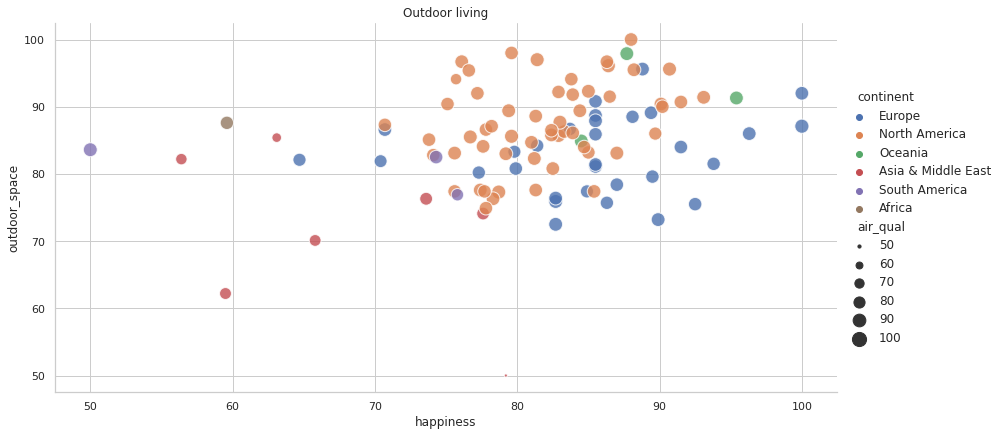

In [155]:
sns.set_style("whitegrid")
sns.relplot(x="happiness", y="outdoor_space", hue="continent", size="air_qual", kind="scatter", sizes= (10, 200), alpha=0.8, height=6, aspect=16/8, data=df).set(title="Outdoor living")

# Chart 4b

We can now look at the work_health dataframe created earlier to see what other aspects can affect outdoor living and wellness. 

In [156]:
work_health

,City,Country,remotejob_pcnt,overworked_pcnt,vacdays_offered,vacdays_taken,unemployment,multjob_pcnt,inflation_pcnt,parental_leave,...,sunshine,water_cost,obesity,life_expect,poll_index,hrs_worked,happiness_y,outdoor,takeaway_locs,gymcost
0,Helsinki,Finland,38.92,12.7,25,30.0,89.3,6.3,4.79,1190.0,...,1662.0,1.60,22.2,80.4,13.08,1540.0,7.80,113.0,309.0,35.23
1,Zurich,Switzerland,44.86,11.9,20,25.0,99.2,7.6,1.80,98.0,...,1566.0,3.20,19.5,82.6,17.31,1557.0,7.56,69.0,538.0,73.11
2,Copenhagen,Denmark,41.42,10.5,25,28.0,94.8,7.6,5.18,364.0,...,1630.0,2.19,19.7,79.8,21.24,1380.0,7.64,154.0,523.0,32.53
3,Sydney,Australia,38.79,9.7,20,14.0,95.9,6.4,6.46,140.0,...,2636.0,1.48,29.0,82.1,26.86,1712.0,7.22,406.0,1103.0,41.66
4,Stockholm,Sweden,44.20,12.7,25,25.0,91.0,7.9,5.74,490.0,...,1821.0,1.72,20.6,81.8,19.63,1452.0,7.35,129.0,598.0,37.31
5,Melbourne,Australia,38.79,9.7,20,14.0,94.5,6.4,6.46,140.0,...,2363.0,1.57,29.0,82.1,25.90,1712.0,7.22,243.0,813.0,36.89
6,Amsterdam,Netherlands,41.55,8.6,20,24.0,95.4,8.1,8.55,114.8,...,1858.0,1.92,20.4,81.2,30.93,1434.0,7.44,422.0,1048.0,34.90
7,Tokyo,Japan,36.52,15.4,10,25.5,96.2,3.6,0.89,770.0,...,1877.0,0.76,4.3,83.2,42.84,1644.0,5.87,387.0,5802.0,70.82
8,Vancouver,Canada,37.81,10.1,10,16.0,93.5,6.7,6.46,364.0,...,1938.0,1.08,29.4,81.7,24.26,1670.0,7.23,218.0,788.0,31.04
9,Toronto,Canada,37.81,10.1,10,16.0,90.4,5.6,6.46,364.0,...,2066.0,1.09,29.4,81.7,37.83,1670.0,7.23,174.0,1656.0,32.64


Text(0.5, 0, 'Total score')

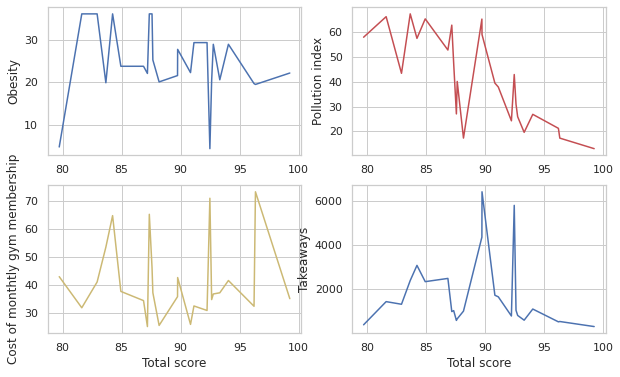

In [157]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(work_health["total_score"], work_health["obesity"], color="b")
ax[0, 1].plot(work_health["total_score"], work_health["poll_index"], color="r")
ax[1, 0].plot(work_health["total_score"], work_health["gymcost"], color="y")
ax[1, 1].plot(work_health["total_score"], work_health["takeaway_locs"], color="b")
ax[0, 0].set_ylabel("Obesity")
ax[0, 1].set_ylabel("Pollution index")
ax[1, 0].set_ylabel("Cost of monthtly gym membership")
ax[1, 1].set_ylabel("Takeaways")

#Only the bottom table gets an x axis label
ax[1, 0].set_xlabel("Total score")
ax[1, 1].set_xlabel("Total score")

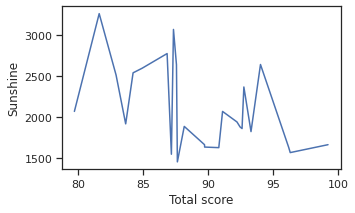

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches([5,3])
ax.plot(work_health["total_score"], work_health["sunshine"])
ax.set_xlabel('Total score')
ax.set_ylabel('Sunshine')
plt.show()

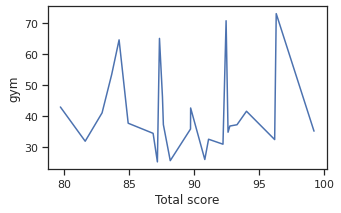

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches([5,3])
ax.plot(work_health["total_score"], work_health["gymcost"])
ax.set_xlabel('Total score')
ax.set_ylabel('gym')
plt.show()

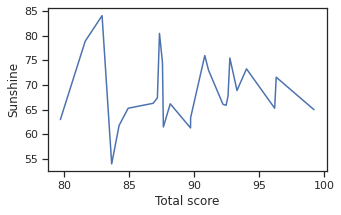

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches([5,3])
ax.plot(work_health["total_score"], work_health["affordability"])
ax.set_xlabel('Total score')
ax.set_ylabel('Sunshine')
plt.show()

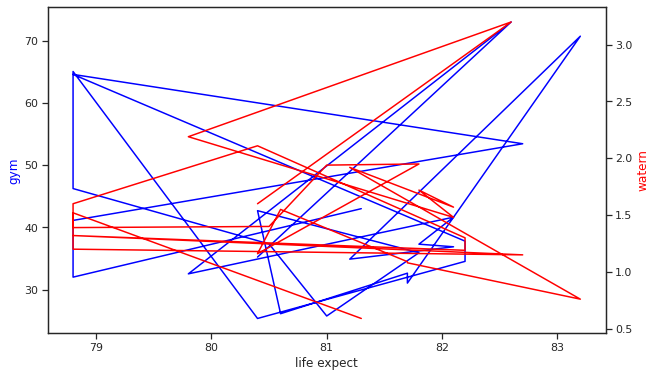

In [ ]:
small_work = work_health[['life_expect', 'gymcost', 'water_cost']]

fig, ax = plt.subplots()
ax.plot(small_work['life_expect'], small_work['gymcost'], color="blue")  
ax.set_xlabel('life expect')
ax.set_ylabel('gym', color="blue")
#ax.ticks_params('y', colors="blue") #can take y or x argument
ax2 = ax.twinx()
ax2.plot(small_work['life_expect'], small_work['water_cost'], color="red")  
ax2.set_ylabel('watern', color="red")
#ax2.ticks_params('y', colors="red") #can take y or x argument
plt.show()

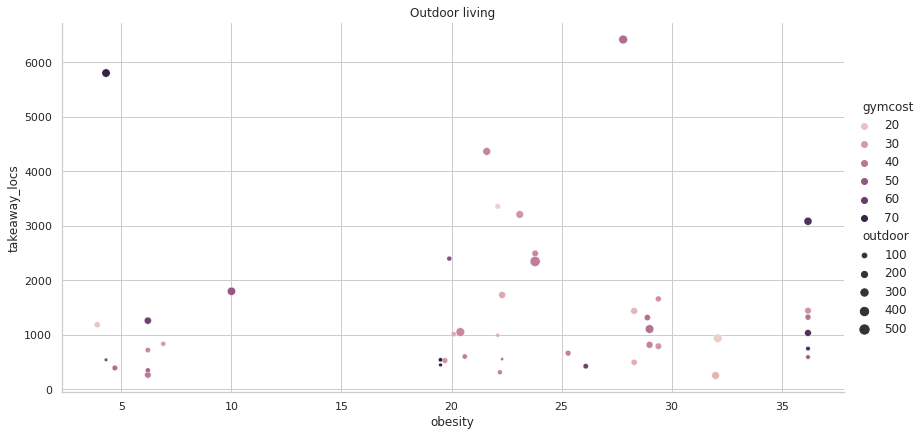

In [ ]:
sns.set_style("whitegrid")
sns.relplot(x="obesity", y="takeaway_locs", hue="gymcost", size="outdoor", sizes=(10, 100), kind="scatter", height=6, aspect=16/8, data=df2).set(title="Outdoor living")

In [ ]:
small_work = work_health[['affordability','total_score', 'gymcost', 'water_cost']]
print(small_work)

    affordability  total_score  gymcost  water_cost
0            65.0        99.24    35.23        1.60
1            71.6        96.33    73.11        3.20
2            65.3        96.21    32.53        2.19
3            73.3        94.04    41.66        1.48
4            68.9        93.31    37.31        1.72
5            75.5        92.76    36.89        1.57
6            67.8        92.62    34.90        1.92
7            65.9        92.47    70.82        0.76
8            66.1        92.23    31.04        1.08
9            73.0        91.12    32.64        1.09
10           76.0        90.83    26.11        1.55
11           63.4        89.74    42.71        1.16
12           61.3        89.73    35.93        1.95
13           66.2        88.17    25.74        1.94
14           61.5        87.64    37.35        1.40
15           74.6        87.57    46.27        1.39
16           80.5        87.34    65.13        1.60
17           67.4        87.18    25.34        2.11
18          

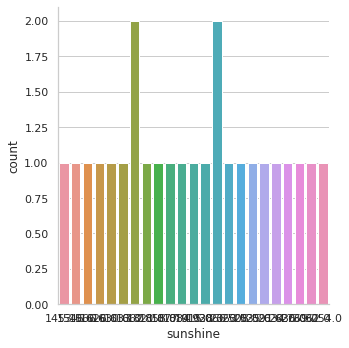

In [ ]:
small_work = work_health[['sunshine','happiness_x','total_score', 'continent']]
sns.catplot(data=small_work, x="sunshine", kind="count")

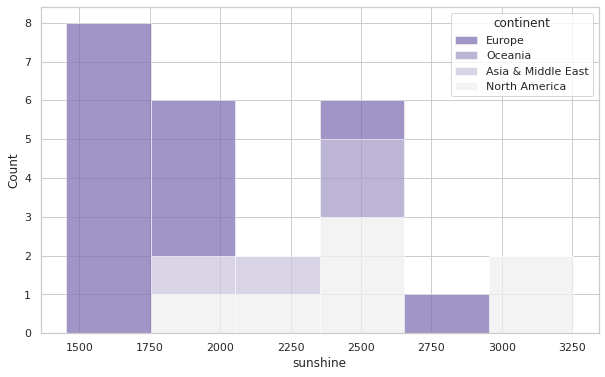

In [ ]:
sns.histplot(small_work, x="sunshine", hue="continent", multiple="stack", palette="light:m_r",linewidth=.5)

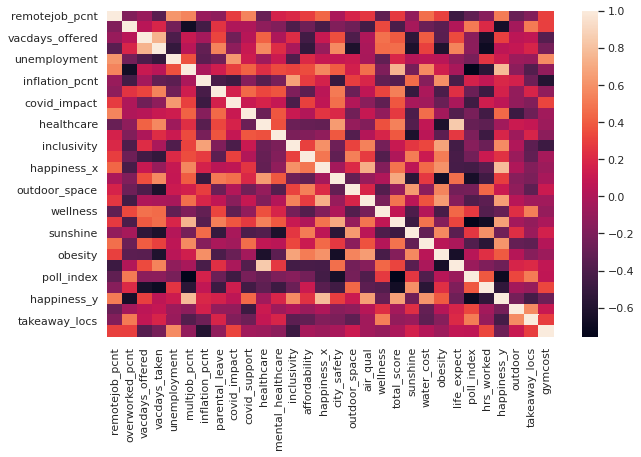

In [ ]:
sns.heatmap(work_health.corr())

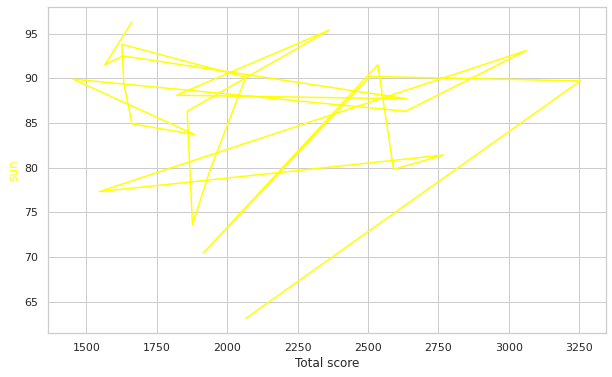

In [ ]:
fig, ax = plt.subplots()
ax.plot(work_health['sunshine'], work_health['happiness_x'], color="yellow")  
ax.set_xlabel('Total score')
ax.set_ylabel('sun', color="yellow")
#ax.ticks_params('y', colors="blue") #can take y or x argument
# ax2 = ax.twinx()
# ax2.plot(work_health['total_score'], work_health['happiness_x'], color="red")  
# ax2.set_ylabel('Vacation off', color="red")
# #ax2.ticks_params('y', colors="red") #can take y or x argument
plt.show()

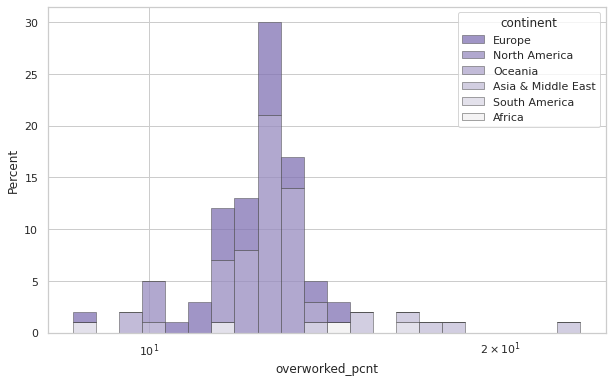

In [ ]:
sns.histplot(df, x="overworked_pcnt", hue="continent", multiple="stack", stat="percent", palette="light:m_r",edgecolor=".3",linewidth=.5,log_scale=True)

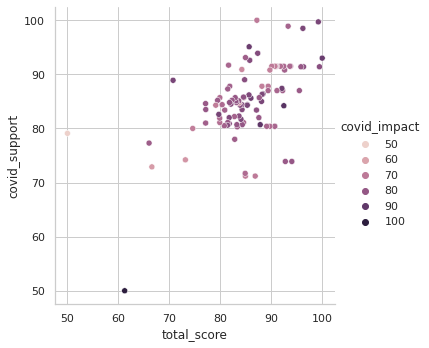

In [ ]:
sns.relplot(data=df, x="total_score", y="covid_support", hue="covid_impact", kind="scatter")

In [ ]:
sns.relplot(x="total_score", y="healthcare", data=df, kind="scatter", col="continent", col_wrap=2)

plt.show()

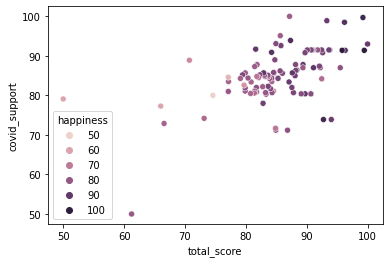

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.scatterplot(data=df, x='total_score', y='overworked_pcnt', hue="happiness")

sns.scatterplot(data=df, x='total_score', y='covid_support', hue="happiness")

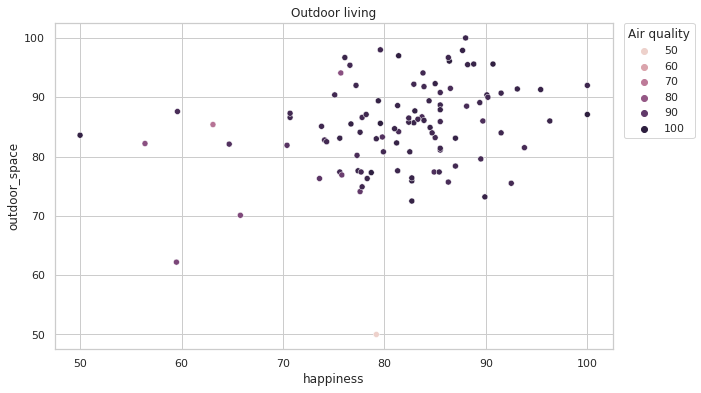

In [ ]:
sns.scatterplot(data=df, x='happiness', y="outdoor_space", hue="air_qual").set(title="Outdoor living")
sns.set(rc = {'figure.figsize':(10,6)})
sns.set_style("whitegrid")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Air quality")

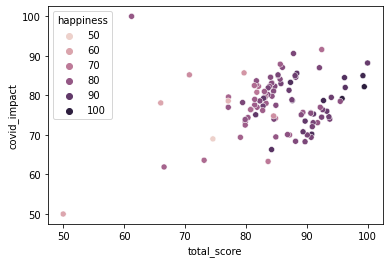

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(data=df, x='total_score', y='covid_impact', hue="happiness")

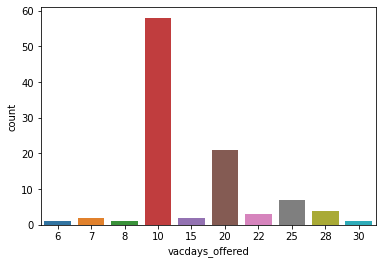

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='vacdays_offered')

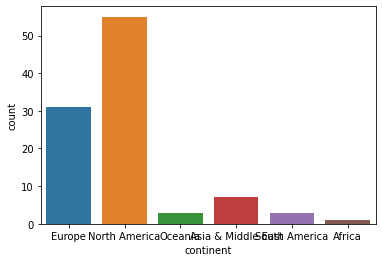

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='continent')

#here we can see that most of the cities in our df are in north america (bear in mind this data was amalgamated from usa cities and then added to others so is moslty
#american)

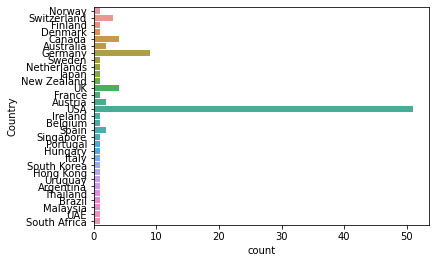

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, y='Country')

#count which countries have the most entries

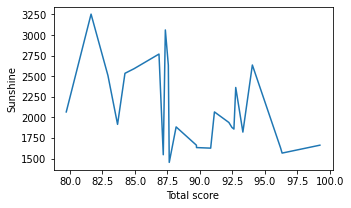

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches([5,3])
ax.plot(work_health["total_score"], work_health["sunshine"])
ax.set_xlabel('Total score')
ax.set_ylabel('Sunshine')
plt.show()

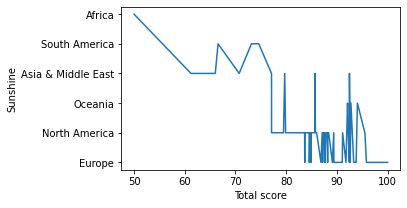

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches([5,3])
ax.plot(df["total_score"], df["continent"])
ax.set_xlabel('Total score')
ax.set_ylabel('Sunshine')
plt.show()

In [ ]:
work_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               25 non-null     object 
 1   Country            25 non-null     object 
 2   remotejob_pcnt     25 non-null     float64
 3   overworked_pcnt    25 non-null     float64
 4   vacdays_offered    25 non-null     int64  
 5   vacdays_taken      25 non-null     float64
 6   unemployment       25 non-null     float64
 7   multjob_pcnt       25 non-null     float64
 8   inflation_pcnt     25 non-null     float64
 9   parental_leave     25 non-null     float64
 10  covid_impact       25 non-null     float64
 11  covid_support      25 non-null     float64
 12  healthcare         25 non-null     float64
 13  mental_healthcare  25 non-null     float64
 14  inclusivity        25 non-null     float64
 15  affordability      25 non-null     float64
 16  happiness_x        25 non-nu

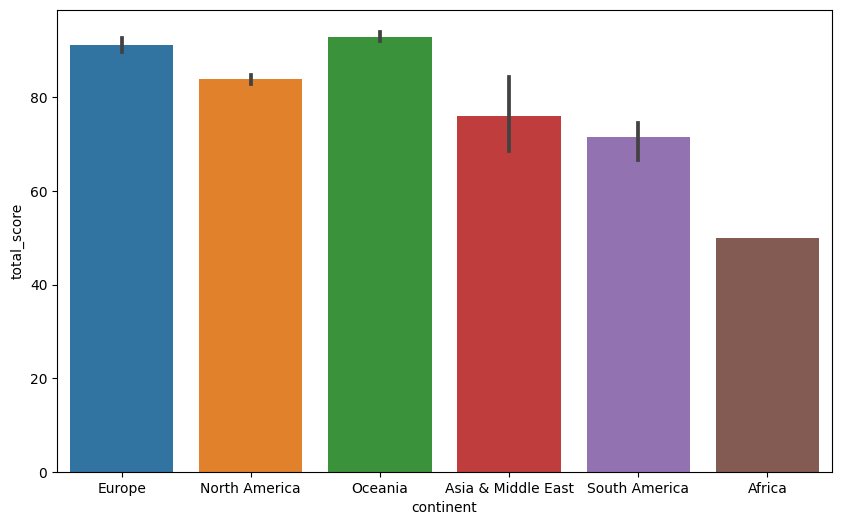

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'continent', y = 'total_score', data = df)

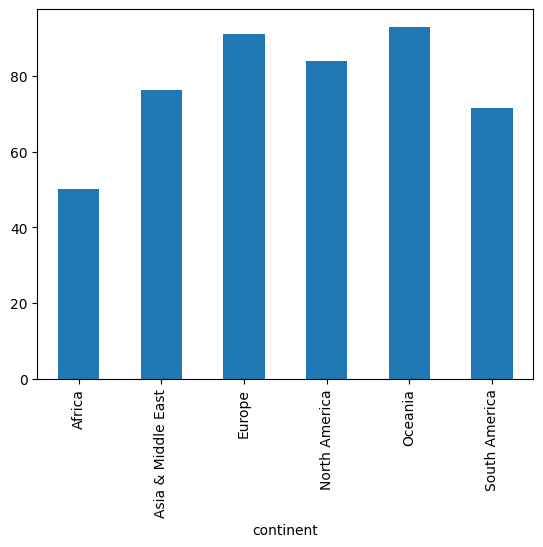

In [ ]:
df_countryscore = df.groupby(["continent"])["total_score"].mean()
df_countryscore.plot(kind="bar")

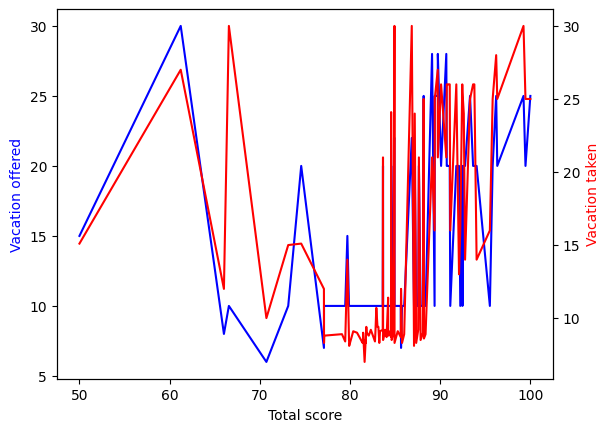

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['total_score'], df['vacdays_offered'], color="blue")  
ax.set_xlabel('Total score')
ax.set_ylabel('Vacation offered', color="blue")
#ax.ticks_params('y', colors="blue") #can take y or x argument
ax2 = ax.twinx()
ax2.plot(df['total_score'], df['vacdays_taken'], color="red")  
ax2.set_ylabel('Vacation taken', color="red")
#ax2.ticks_params('y', colors="red") #can take y or x argument
plt.show()

Text(0.5, 0, 'Total score')

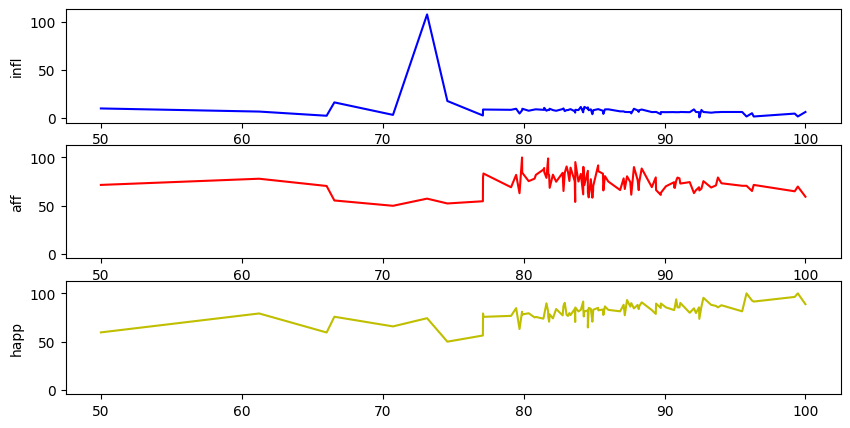

In [ ]:
fig, ax = plt.subplots(3, 1, sharey=True)
fig.set_size_inches([10,5])
ax[0].plot(df["total_score"], df["inflation_pcnt"], color="b")
ax[1].plot(df["total_score"], df["affordability"], color="r")
ax[2].plot(df["total_score"], df["happiness"], color="y")
ax[0].set_ylabel("infl")
ax[1].set_ylabel("aff")
ax[2].set_ylabel("happ")

#Only the bottom table gets an x axis label
ax[1].set_xlabel("Total score")

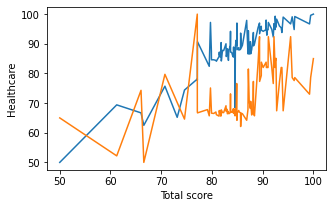

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches([5,3])
ax.plot(df["total_score"], df["healthcare"])
ax.plot(df["total_score"], df["mental_healthcare"])
ax.set_xlabel('Total score')
ax.set_ylabel('Healthcare')

plt.show()

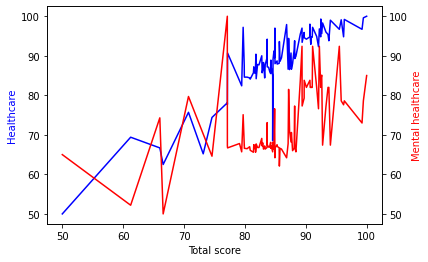

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['total_score'], df['healthcare'], color="blue")  
ax.set_xlabel('Total score')
ax.set_ylabel('Healthcare', color="blue")
#ax.ticks_params('y', colors="blue") #can take y or x argument
ax2 = ax.twinx()
ax2.plot(df['total_score'], df['mental_healthcare'], color="red")  
ax2.set_ylabel('Mental healthcare', color="red")
#ax2.ticks_params('y', colors="red") #can take y or x argument
plt.show()

Text(0.5, 0, 'Total score')

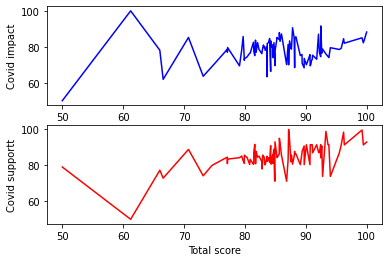

In [ ]:
fig, ax = plt.subplots(2, 1, sharey=True)

ax[0].plot(df["total_score"], df["covid_impact"], color="b")
ax[1].plot(df["total_score"], df["covid_support"], color="r")
ax[0].set_ylabel("Covid impact")
ax[1].set_ylabel("Covid support")

#Only the bottom table gets an x axis label
ax[1].set_xlabel("Total score")

Text(0.5, 0, 'Total score')

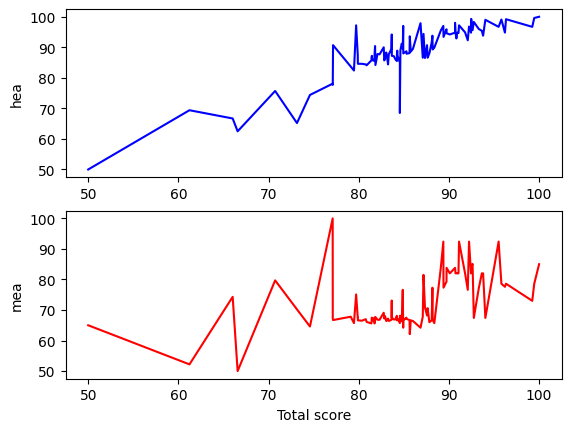

In [ ]:
fig, ax = plt.subplots(2, 1, sharey=True)

ax[0].plot(df["total_score"], df["healthcare"], color="b")
ax[1].plot(df["total_score"], df["mental_healthcare"], color="r")
ax[0].set_ylabel("hea")
ax[1].set_ylabel("mea")

#Only the bottom table gets an x axis label
ax[1].set_xlabel("Total score")

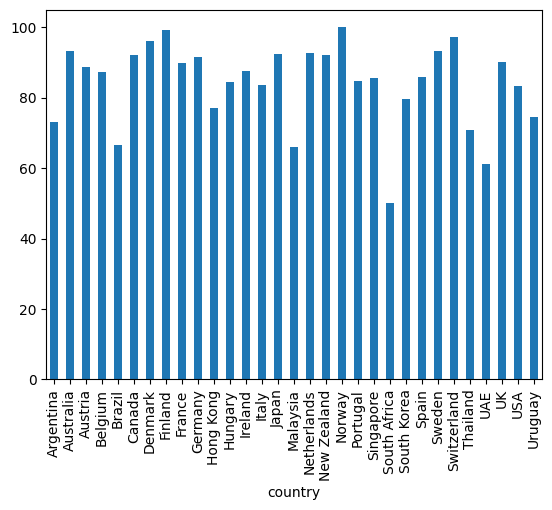

In [ ]:
df_countryscore = df.groupby(["country"])["total_score"].mean()
df_countryscore.plot(kind="bar")

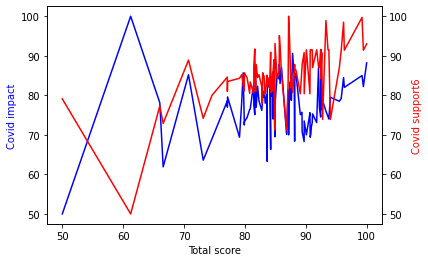

In [ ]:
fig, ax = plt.subplots()
ax.plot(df['total_score'], df['covid_impact'], color="blue")  
ax.set_xlabel('Total score')
ax.set_ylabel('Covid impact', color="blue")
#ax.ticks_params('y', colors="blue") #can take y or x argument
ax2 = ax.twinx()
ax2.plot(df['total_score'], df['covid_support'], color="red")  
ax2.set_ylabel('Covid support6', color="red")
#ax2.ticks_params('y', colors="red") #can take y or x argument
plt.show()

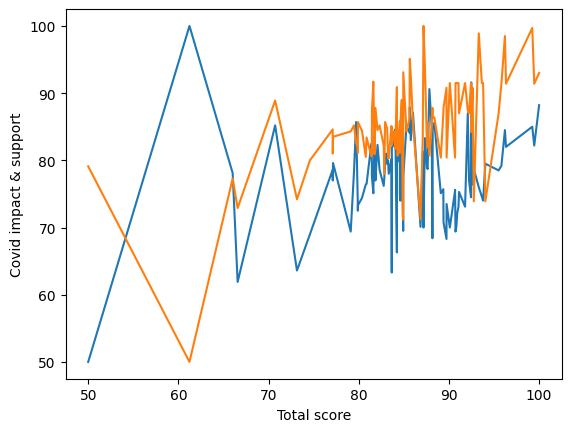

In [ ]:
plt.style.use("default")
fig, ax = plt.subplots()
ax.plot(df['total_score'], df['covid_impact'])
ax.plot(df['total_score'], df['covid_support'])    
ax.set_xlabel('Total score')
ax.set_ylabel('Covid impact & support')
# ax.legend()

plt.show()

fig.savefig("covid.jpg")


In [ ]:


#group data by product and display sales as line chart
health = df.groupby('wellness')['air_qual'].size()
health.plot.bar()

In [ ]:
df.groupby("total_score")["inflation_pcnt"].size()

total_score
50.00     1
61.23     1
66.02     1
66.57     1
70.73     1
         ..
96.21     1
96.33     1
99.24     1
99.46     1
100.00    1
Name: inflation_pcnt, Length: 97, dtype: int64

In [ ]:
ls

covid.png  sample_data/


In [ ]:
outdoorsdf = df.groupby(["outdoor_space", "air_qual", "wellness"])
outdoorsdf

# New Section

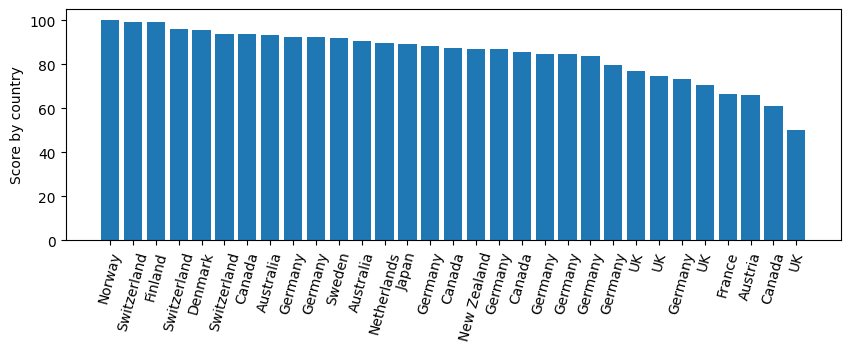

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches([10, 3])
ax.bar(df['country'], df["total_score"])
ax.set_xticklabels(df['country'], rotation=75)
ax.set_ylabel("Score by country")
plt.show()

['Norway' 'Switzerland' 'Finland' 'Denmark' 'Canada' 'Australia' 'Germany'
 'Sweden' 'Netherlands' 'Japan' 'New Zealand' 'UK' 'France' 'Austria'
 'USA' 'Ireland' 'Belgium' 'Spain' 'Singapore' 'Portugal' 'Hungary'
 'Italy' 'South Korea' 'Hong Kong' 'Uruguay' 'Argentina' 'Thailand'
 'Brazil' 'Malaysia' 'UAE' 'South Africa']


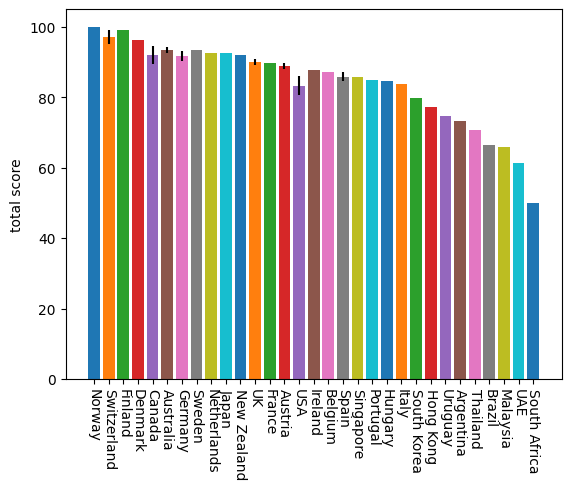

In [ ]:
countries = df["country"].unique()
print(countries)

fig, ax = plt.subplots()

for country in countries:
  country_df = df[df["country"] == country]
  ax.bar(country, country_df["total_score"].mean(),
         yerr=country_df["total_score"].std())
ax.set_ylabel("total score")
ax.set_xticklabels(countries, rotation=-90)
plt.show()

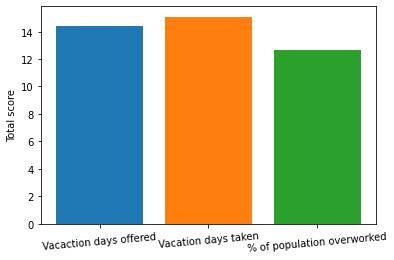

In [ ]:
fig, ax = plt.subplots()
ax.bar("Vacation days offered", df["vacdays_offered"].mean())
ax.bar("Vacation days taken", df["vacdays_taken"].mean())
ax.bar("Overworked population", df["overworked_pcnt"].mean())
ax.set_xticklabels(labels=('Vacaction days offered', 'Vacation days taken', '% of population overworked'), rotation=5)
ax.set_ylabel("Total score")
plt.show()

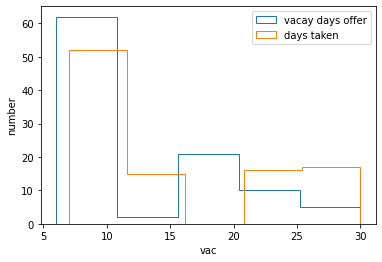

In [ ]:
fig, ax = plt.subplots()
ax.hist(df["vacdays_offered"], label="vacay days offer", bins=5, histtype="step")
ax.hist(df["vacdays_taken"], label="days taken", bins=5, histtype="step")
ax.set_xlabel("vac")
ax.set_ylabel("number")
ax.legend()
plt.show()

No handles with labels found to put in legend.


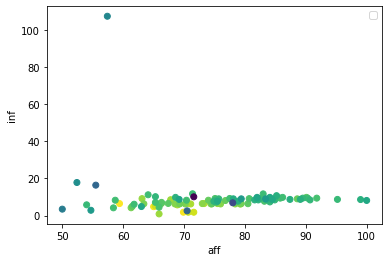

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["affordability"], df["inflation_pcnt"], c=df["total_score"])
ax.set_xlabel("aff")
ax.set_ylabel("inf")
ax.legend()
plt.show()

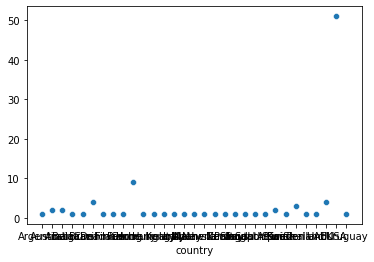

In [ ]:
# df.groupby(['country'=="USA"])
res = df.groupby(['country']).size()
sns.scatterplot(x  = res.index, y = res.values)

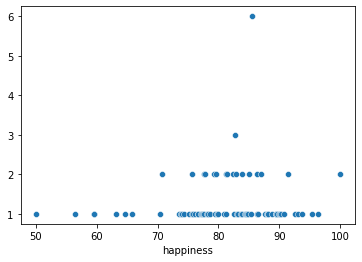

In [ ]:
import seaborn as sns
result = df.groupby(['happiness']).size()
 
# plot the result
sns.scatterplot(x = result.index, y = result.values)

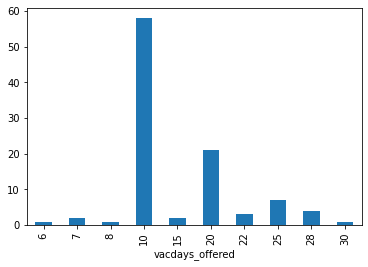

In [ ]:
df.groupby(['vacdays_offered']).size().plot(kind = "bar")

In [ ]:
df.groupby(['country']).plot(kind="bar")

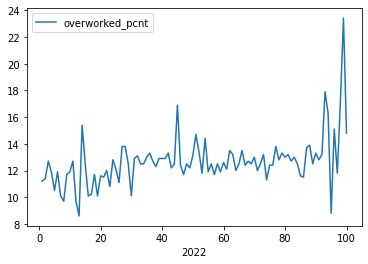

In [ ]:
df[['overworked_pcnt']].plot()

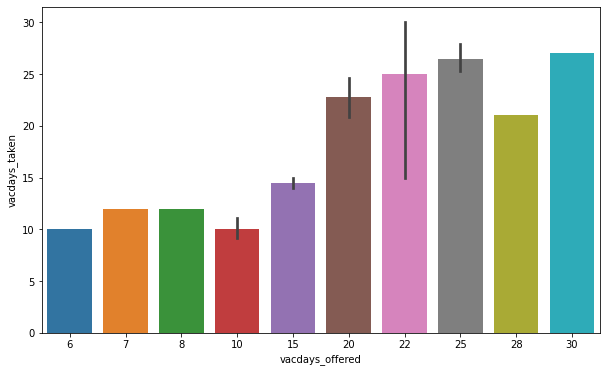

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'vacdays_offered', y = 'vacdays_taken', data = df)

# df.plot(kind='line',x='vacdays_offered',y='overworked_pcnt',color='yellow')
# # plt.bar('sunshine)', 'life_expect', data=dfsun)
# plt.show()

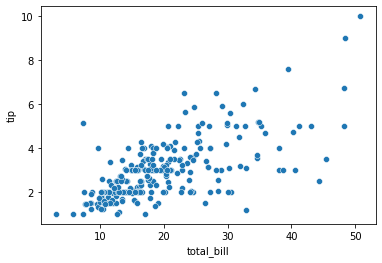

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip');

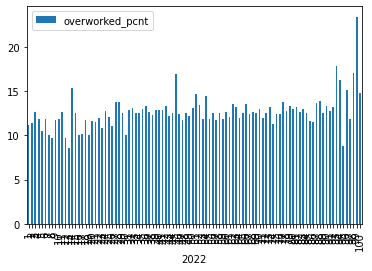

In [ ]:
df[['overworked_pcnt']].plot.bar()

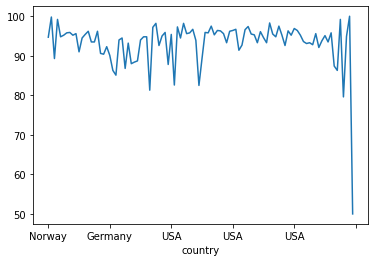

In [ ]:
# countries_grouped = df.groupby(['country']).mean()
# print(countries_grouped)

# df.set_index('country', inplace=True)
# df[['healthcare']].plot()

#sets country as the index and plots healthcare

# unemployment_grouped = df.groupby(['unemployment']).mean()
df['unemployment'].plot()

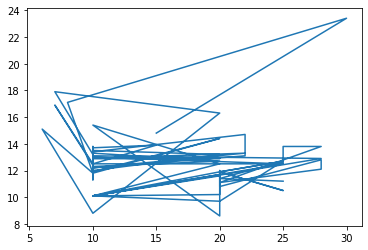

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.plot('Minimum Vacations Offered (Days)','Overworked Population')
#plt.show()

fig, ax = plt.subplots()
ax.plot(df['vacdays_offered'], df['overworked_pcnt'])
plt.show()


In [ ]:
df.isnull().sum()

2022                 0
city                 0
country              0
remotejob_pcnt       0
overworked_pcnt      0
vacdays_offered      0
unemployment         0
multjob_pcnt         0
inflation_pcnt       0
parental_leave       0
covid_impact         0
covid_support        0
healthcare           0
mental_healthcare    0
inclusivity          0
affordability        0
happiness            0
city_safety          0
outdoor_space        0
air_qual             0
wellness             0
total_score          0
dtype: int64

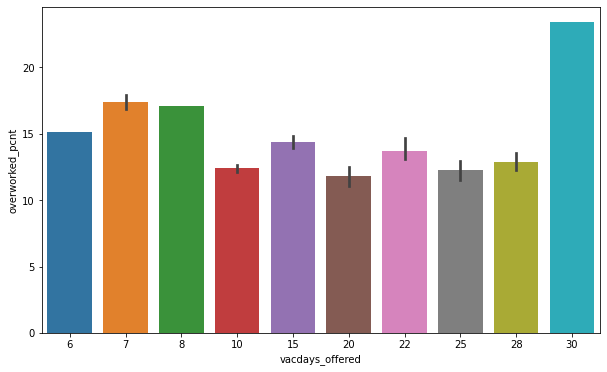

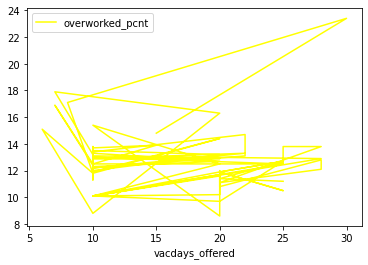

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'vacdays_offered', y = 'overworked_pcnt', data = df)

df.plot(kind='line',x='vacdays_offered',y='overworked_pcnt',color='yellow')
# plt.bar('sunshine)', 'life_expect', data=dfsun)
plt.show()

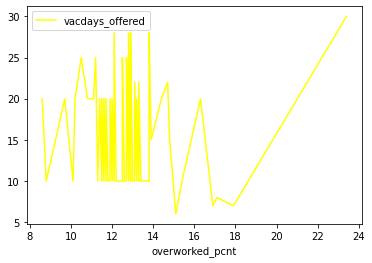

In [ ]:
dfwork=df.sort_values(["overworked_pcnt", "vacdays_offered"])
dfwork.plot(kind='line',x='overworked_pcnt',y='vacdays_offered',color='yellow')

